## Metric plots for poster

In [54]:
import pandas as pd
from pprint import pprint

v1_v3_eval = pd.read_csv("data/v1_v3_evaluation_result.csv")
v1_v4_eval = pd.read_csv("data/v1_v4_evaluation_result.csv")
v2_v3_eval = pd.read_csv("data/v2_v3_evaluation_result.csv")
v2_v4_eval = pd.read_csv("data/v2_v4_evaluation_result.csv")

v1_v3_mean_eval = pd.read_json("data/v1_v3_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v1_v3_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v1_v3_mean_eval.index = v1_v3_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v1_v4_mean_eval = pd.read_json("data/v1_v4_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v1_v4_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v1_v4_mean_eval.index = v1_v4_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v2_v3_mean_eval = pd.read_json("data/v2_v3_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v2_v3_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v2_v3_mean_eval.index = v2_v3_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v2_v4_mean_eval = pd.read_json("data/v2_v4_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v2_v4_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v2_v4_mean_eval.index = v2_v4_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

# Combine all evaluations into a single DataFrame
combined_eval = pd.DataFrame({
    'v1_v3': v1_v3_mean_eval,
    'v1_v4': v1_v4_mean_eval,
    'v2_v3': v2_v3_mean_eval,
    'v2_v4': v2_v4_mean_eval
})


In [55]:
from scipy import stats

# Calculate the harmonic mean of comprehensiveness_score and groundedness_score
v1_v3_eval['harmonic_mean'] = stats.hmean(v1_v3_eval[['comprehensiveness_score', 'groundedness_score']], axis=1)

# Filter rows where the harmonic mean is greater than or equal to 0.7
v1_v3_eval_filtered = v1_v3_eval[v1_v3_eval['harmonic_mean'] >= 0.6]

v1_v3_eval_filtered

,similarity_score,comprehensiveness_score,groundedness_score,company_list,category,harmonic_mean
7,1.0,0.500000,0.766323,"{'generali_', 'huk-coburg_', 'arag_', 'barmeni...",Haftpflichtversicherung,0.605156
8,1.0,1.000000,0.909091,"{'generali_', 'axa_'}",Betriebsunterbrechungsversicherung,0.952381
9,1.0,0.625000,0.846154,"{'generali_', 'huk-coburg_', 'arag_', 'barmeni...",Hausratversicherung,0.718954
10,1.0,0.761905,0.708333,"{'generali_', 'huk-coburg_', 'barmenia_json', ...",Gebäudeversicherung,0.734143
11,1.0,0.900000,0.920635,"{'axa_', 'arag_'}",Geschäftsinhaltsversicherung,0.910201
14,0.5,1.000000,0.888889,"{'axa_', 'arag_'}",Kreditversicherung,0.941176
16,1.0,0.733333,0.871795,"{'huk-coburg_', 'barmenia_json', 'axa_', 'arag_'}",Elementarversicherung,0.796592
20,1.0,0.791667,0.750000,"{'huk-coburg_', 'barmenia_json', 'arag_'}",Tierversicherung,0.770270
21,1.0,1.000000,0.500000,"{'huk-coburg_', 'barmenia_json'}",Fahrerschutzversicherung,0.666667
22,1.0,0.933333,0.651252,"{'huk-coburg_', 'arag_', 'barmenia_json', 'axa...",Rechtsschutzversicherung,0.767185


In [56]:
from scipy import stats

# Calculate the harmonic mean of comprehensiveness_score and groundedness_score
v2_v3_eval['harmonic_mean'] = stats.hmean(v2_v3_eval[['comprehensiveness_score', 'groundedness_score']], axis=1)

# Filter rows where the harmonic mean is greater than or equal to 0.7
v2_v3_eval_filtered = v2_v3_eval[v2_v3_eval['harmonic_mean'] >= 0.6]

v2_v3_eval_filtered

,similarity_score,comprehensiveness_score,groundedness_score,company_list,category,harmonic_mean
0,1.0,1.000000,0.666667,"{'v2_axa.json', 'v2_barmenia.json', 'v2_ergo.j...",Risikolebensversicherung,0.800000
1,1.0,1.000000,0.666667,"{'v2_axa.json', 'v2_sdk.json', 'v2_ergo.json'}",Gemischte Lebensversicherung,0.800000
4,1.0,1.000000,0.619048,"{'v2_generali.json', 'v2_barmenia.json', 'v2_e...",Grundfähigkeitsversicherung,0.764706
6,1.0,0.916667,0.500000,"{'v2_barmenia.json', 'v2_ergo.json', 'v2_dkv.j...",Pflegetagegeldversicherung,0.647059
11,1.0,1.000000,0.600000,"{'v2_axa.json', 'v2_generali.json', 'v2_arag.j...",Geschäftsinhaltsversicherung,0.750000
12,1.0,0.714286,0.733333,"{'v2_axa.json', 'v2_arag.json', 'v2_barmenia.j...",Gewerbeversicherung,0.723684
13,1.0,1.000000,0.555556,"{'v2_axa.json', 'v2_barmenia.json', 'v2_genera...",Bauleistungsversicherung,0.714286
15,1.0,1.000000,0.600000,"{'v2_axa.json', 'v2_arag.json'}",Kreditversicherung,0.750000
20,1.0,0.904762,0.714286,"{'v2_huk-coburg.json', 'v2_barmenia.json', 'v2...",Tierversicherung,0.798319
21,1.0,1.000000,1.000000,"{'v2_barmenia.json', 'v2_generali.json', 'v2_h...",Fahrerschutzversicherung,1.000000


In [57]:
from scipy import stats

# Calculate the harmonic mean of comprehensiveness_score and groundedness_score
v1_v4_eval['harmonic_mean'] = stats.hmean(v1_v4_eval[['comprehensiveness_score', 'groundedness_score']], axis=1)

# Filter rows where the harmonic mean is greater than or equal to 0.7
v1_v4_eval_filtered = v1_v4_eval[v1_v4_eval['harmonic_mean'] >= 0.6]

v1_v4_eval_filtered

,similarity_score,comprehensiveness_score,groundedness_score,company_list,category,harmonic_mean
0,1.0,0.800000,0.571429,"{'barmenia.json', 'ergo.json', 'axa.json', 'hu...",Risikolebensversicherung,0.666667
4,1.0,0.944444,0.819820,"{'barmenia.json', 'ergo.json', 'axa.json', 'hu...",Grundfähigkeitsversicherung,0.877730
6,1.0,0.866667,0.523810,"{'sdk.json', 'barmenia.json', 'huk-coburg.json...",Pflegetagegeldversicherung,0.652968
8,1.0,1.000000,0.833333,"{'generali.json', 'axa.json'}",Betriebsunterbrechungsversicherung,0.909091
9,1.0,0.625000,0.800000,"{'barmenia.json', 'huk-coburg.json', 'generali...",Hausratversicherung,0.701754
11,1.0,0.888889,0.766667,"{'arag.json', 'axa.json'}",Geschäftsinhaltsversicherung,0.823266
16,1.0,0.761905,0.786325,"{'barmenia.json', 'arag.json', 'axa.json', 'hu...",Elementarversicherung,0.773922
19,1.0,1.000000,0.913043,"{'arag.json', 'axa.json'}",Transportversicherung,0.954545


In [58]:
from scipy import stats

# Calculate the harmonic mean of comprehensiveness_score and groundedness_score
v2_v4_eval['harmonic_mean'] = stats.hmean(v2_v4_eval[['comprehensiveness_score', 'groundedness_score']], axis=1)

# Filter rows where the harmonic mean is greater than or equal to 0.7
v2_v4_eval_filtered = v2_v4_eval[v2_v4_eval['harmonic_mean'] >= 0.6]

v2_v4_eval_filtered

,similarity_score,comprehensiveness_score,groundedness_score,company_list,category,harmonic_mean
4,1.0,0.833333,0.619048,"{'v2_generali.json', 'v2_huk-coburg.json', 'v2...",Grundfähigkeitsversicherung,0.710383
6,1.0,0.708333,0.708333,"{'v2_dkv.json', 'v2_barmenia.json', 'v2_sdk.js...",Pflegetagegeldversicherung,0.708333
9,1.0,0.722222,0.600000,"{'v2_axa.json', 'v2_arag.json', 'v2_barmenia.j...",Hausratversicherung,0.655462
10,1.0,0.666667,0.800000,"{'v2_axa.json', 'v2_arag.json', 'v2_barmenia.j...",Gebäudeversicherung,0.727273
13,1.0,1.000000,0.750000,"{'v2_generali.json', 'v2_axa.json', 'v2_barmen...",Bauleistungsversicherung,0.857143
14,1.0,1.000000,0.600000,"{'v2_generali.json', 'v2_axa.json'}",Maschinenkasko- und Maschinenbruchversicherung,0.750000
16,0.8,0.952381,0.500000,"{'v2_huk-coburg.json', 'v2_axa.json', 'v2_arag...",Elementarversicherung,0.655738
19,1.0,0.761905,0.606061,"{'v2_generali.json', 'v2_axa.json', 'v2_arag.j...",Transportversicherung,0.675105
21,1.0,1.000000,0.619048,"{'v2_generali.json', 'v2_barmenia.json', 'v2_h...",Fahrerschutzversicherung,0.764706


#### Metric overview

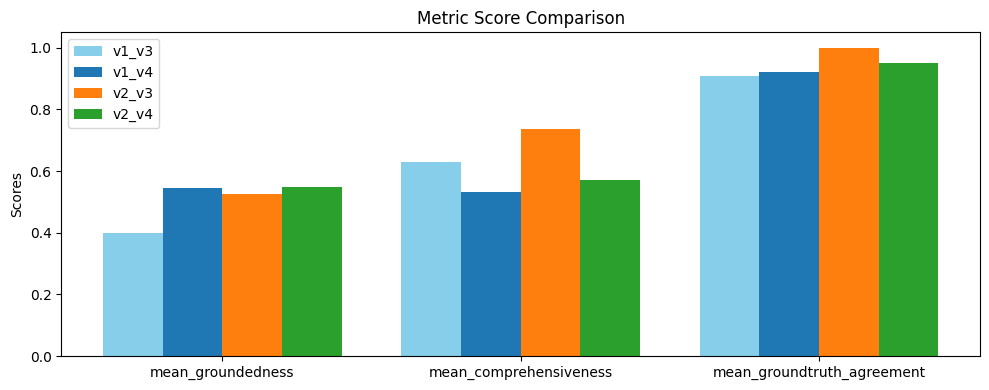

In [59]:
import matplotlib.pyplot as plt

# Create a single figure and axis with a smaller size
fig, ax = plt.subplots(figsize=(10, 4))

# Reorder the indices to start with 'groundedness'
reordered_indices = ['mean_groundedness', 'mean_comprehensiveness', 'mean_groundtruth_agreement']

# Plot all evaluations on the same bar chart with reordered indices using slightly darker colors
ax.bar(range(len(reordered_indices)), v1_v3_mean_eval[reordered_indices], width=0.2, label='v1_v3', align='center', color=(135/255, 206/255, 235/255))  # Slightly darker blue
ax.bar([x + 0.2 for x in range(len(reordered_indices))], v1_v4_mean_eval[reordered_indices], width=0.2, label='v1_v4', align='center')#, color=(102/255, 205/255, 102/255))  # Slightly darker green
ax.bar([x + 0.4 for x in range(len(reordered_indices))], v2_v3_mean_eval[reordered_indices], width=0.2, label='v2_v3', align='center')#, color=(186/255, 85/255, 211/255))  # Slightly darker purple
ax.bar([x + 0.6 for x in range(len(reordered_indices))], v2_v4_mean_eval[reordered_indices], width=0.2, label='v2_v4', align='center')#, color=(255/255, 165/255, 79/255))  # Slightly darker orange

# Set titles and labels
ax.set_title('Metric Score Comparison')
# ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_xticks([x + 0.3 for x in range(len(reordered_indices))])
ax.set_xticklabels(reordered_indices)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


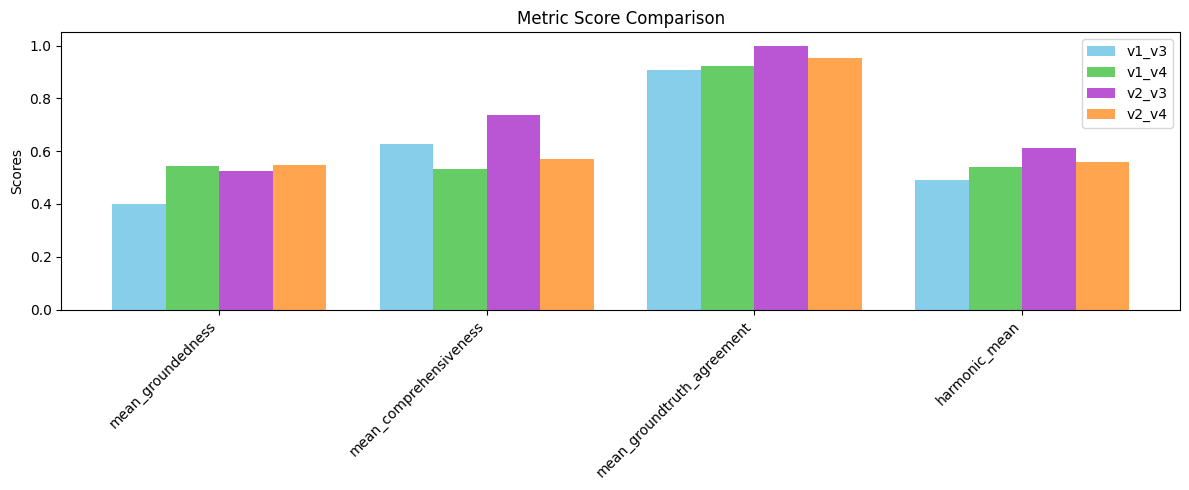

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Create a single figure and axis with a smaller size
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust graph size

# Reorder the indices to start with 'groundedness'
reordered_indices = ['mean_groundedness', 'mean_comprehensiveness', 'mean_groundtruth_agreement']

# Calculate harmonic mean of groundedness and comprehensiveness
v1_v3_harmonic_mean = 2 / ((1 / v1_v3_mean_eval['mean_groundedness']) + (1 / v1_v3_mean_eval['mean_comprehensiveness']))
v1_v4_harmonic_mean = 2 / ((1 / v1_v4_mean_eval['mean_groundedness']) + (1 / v1_v4_mean_eval['mean_comprehensiveness']))
v2_v3_harmonic_mean = 2 / ((1 / v2_v3_mean_eval['mean_groundedness']) + (1 / v2_v3_mean_eval['mean_comprehensiveness']))
v2_v4_harmonic_mean = 2 / ((1 / v2_v4_mean_eval['mean_groundedness']) + (1 / v2_v4_mean_eval['mean_comprehensiveness']))

# Add harmonic mean to the reordered indices
reordered_indices.append('harmonic_mean')

# Calculate x positions
x = range(len(reordered_indices))
width = 0.2

# Plot all evaluations on the same bar chart
ax.bar(x, list(v1_v3_mean_eval[reordered_indices[:-1]]) + [v1_v3_harmonic_mean], width, label='v1_v3', color=(135/255, 206/255, 235/255))
ax.bar([i + width for i in x], list(v1_v4_mean_eval[reordered_indices[:-1]]) + [v1_v4_harmonic_mean], width, label='v1_v4', color=(102/255, 205/255, 102/255))
ax.bar([i + width*2 for i in x], list(v2_v3_mean_eval[reordered_indices[:-1]]) + [v2_v3_harmonic_mean], width, label='v2_v3', color=(186/255, 85/255, 211/255))
ax.bar([i + width*3 for i in x], list(v2_v4_mean_eval[reordered_indices[:-1]]) + [v2_v4_harmonic_mean], width, label='v2_v4', color=(255/255, 165/255, 79/255))

# Set titles and labels
ax.set_title('Metric Score Comparison')
ax.set_ylabel('Scores')

# Adjust x-axis ticks and labels
ax.set_xticks([i + width*1.5 for i in x])  # Center label positions
ax.set_xticklabels(reordered_indices, rotation=45, ha='right')  # Rotate labels

# Add legend
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Eval metrics per category

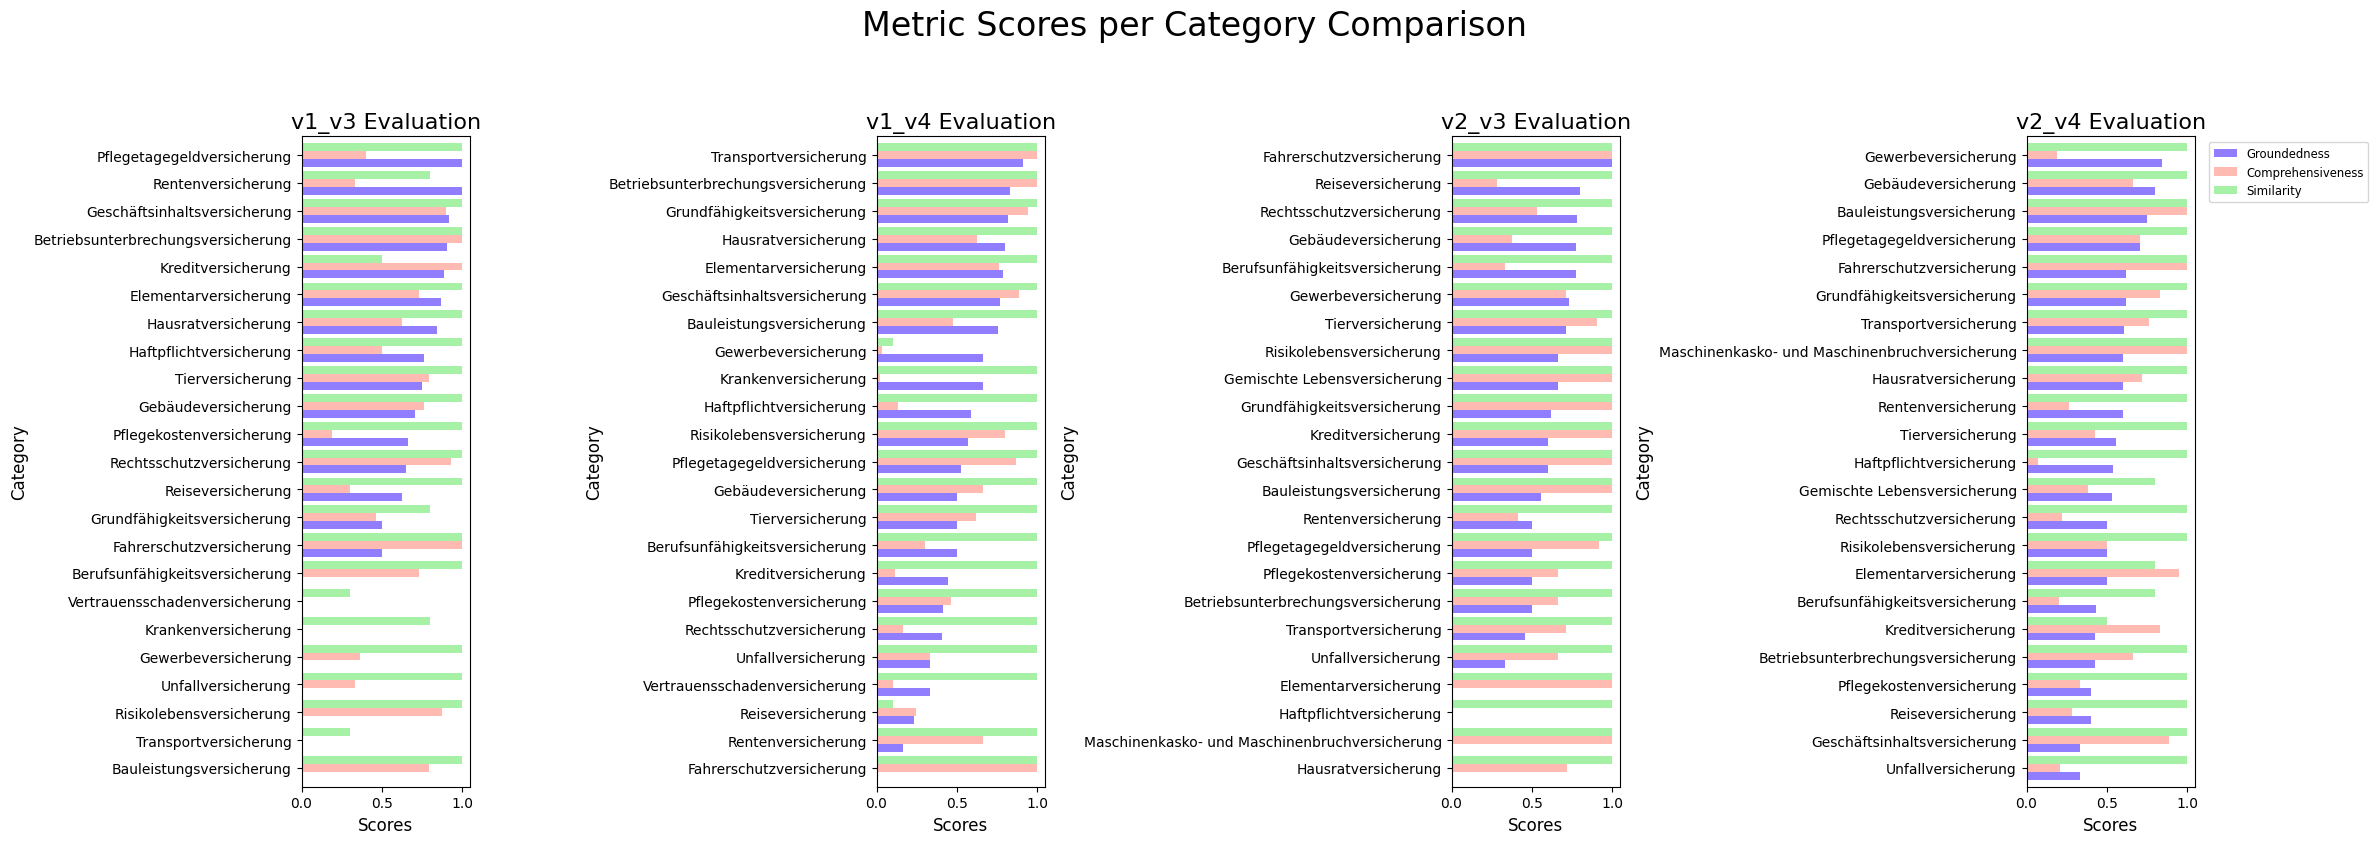

In [61]:
import matplotlib.pyplot as plt

# Calculate mean values for all evaluation data
eval_means = {
    'v1_v3': v1_v3_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna(),
    'v1_v4': v1_v4_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna(),
    'v2_v3': v2_v3_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna(),
    'v2_v4': v2_v4_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna()
}

# Create a figure with 4 subplots horizontally
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle('Metric Scores per Category Comparison', fontsize=24, y=1.05)

# Colors for the bars
colors = [(70/255, 40/255, 255/255, 0.6),    # Blue
         (255/255, 120/255, 100/255, 0.5),   # Pink-Red
         (144/255, 238/255, 144/255, 0.8)]   # Light Green

# Plot each evaluation data
for idx, (name, data) in enumerate(eval_means.items()):
    # Sort by groundedness score
    data_sorted = data.sort_values(by='groundedness_score', ascending=True)
    
    # Create horizontal bar plot
    data_sorted.plot(kind='barh', ax=axes[idx], width=0.85, color=colors)
    
    # Customize each subplot
    axes[idx].set_xlabel('Scores', fontsize=12)
    axes[idx].set_ylabel('Category', fontsize=12)
    axes[idx].set_title(f'{name} Evaluation', fontsize=16)
    axes[idx].tick_params(axis='both', labelsize=10)
    
    # Only show legend for the last subplot
    if idx == 3:
        axes[idx].legend(['Groundedness', 'Comprehensiveness', 'Similarity'], 
                        loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1))
    else:
        axes[idx].legend().remove()

plt.tight_layout()
plt.show()

# Dataset Overview ( company, product, category )
- Count the number of companies and products per category 

In [62]:
import pandas as pd
import ast

v1_v3_comparison_table_for_evaluation = pd.read_csv("data/v1_v3_comparison_table_for_evaluation.csv")
v1_v4_comparison_table_for_evaluation = pd.read_csv("data/v1_v4_comparison_table_for_evaluation.csv")
v2_v3_comparison_table_for_evaluation = pd.read_csv("data/v2_v3_comparison_table_for_evaluation.csv")
v2_v4_comparison_table_for_evaluation = pd.read_csv("data/v2_v4_comparison_table_for_evaluation.csv")

### Basic Categorization Prompt(v1) + Basic/Advanced Comparison Prompt(v3/v4)

##### v1_v3 result dataset overview

In [63]:
v1_v3_company_set = set()
v1_v3_product_set = set()
for idx, row in v1_v3_comparison_table_for_evaluation.iterrows():
    v1_v3_company_set.update(ast.literal_eval(row['company_names']))
    v1_v3_product_set.update(ast.literal_eval(row['product_names']))

print('v1_v3 company count : ', len(v1_v3_company_set))
print('v1_v3 product count : ', len(v1_v3_product_set))
print('v1_v3 category count : ', len(v1_v3_comparison_table_for_evaluation))

v1_v3 company count :  8
v1_v3 product count :  532
v1_v3 category count :  23


##### v1_v4 result dataset overview

In [64]:
v1_v4_company_set = set()
v1_v4_product_set = set()
for idx, row in v1_v4_comparison_table_for_evaluation.iterrows():
    v1_v4_company_set.update(ast.literal_eval(row['company_names']))
    v1_v4_product_set.update(ast.literal_eval(row['product_names']))

print('v1_v4 company count : ', len(v1_v4_company_set))
print('v1_v4 product count : ', len(v1_v4_product_set))
print('v1_v4 category count : ', len(v1_v4_comparison_table_for_evaluation))

v1_v4 company count :  8
v1_v4 product count :  532
v1_v4 category count :  23


### Advanced Categorization Prompt(v2) + Basic/Advanced Comparison Prompt(v3/v4)

##### v2_v3 result dataset overview 

In [65]:
v2_v3_company_set = set()
v2_v3_product_set = set()
for idx, row in v2_v3_comparison_table_for_evaluation.iterrows():
    v2_v3_company_set.update(ast.literal_eval(row['company_names']))
    v2_v3_product_set.update(ast.literal_eval(row['product_names']))

print('v2_v3 company count : ', len(v2_v3_company_set))
print('v2_v3 product count : ', len(v2_v3_product_set))
print('v2_v3 category count : ', len(v2_v3_comparison_table_for_evaluation))

v2_v3 company count :  8
v2_v3 product count :  401
v2_v3 category count :  23


##### v2_v4 result dataset overview 

In [66]:
v2_v4_company_set = set()
v2_v4_product_set = set()
for idx, row in v2_v4_comparison_table_for_evaluation.iterrows():
    v2_v4_company_set.update(ast.literal_eval(row['company_names']))
    v2_v4_product_set.update(ast.literal_eval(row['product_names']))

print('v2_v4 company count : ', len(v2_v4_company_set))
print('v2_v4 product count : ', len(v2_v4_product_set))
print('v2_v4 category count : ', len(v2_v4_comparison_table_for_evaluation))

v2_v4 company count :  8
v2_v4 product count :  401
v2_v4 category count :  23


In [67]:
v1_v4_eval

,similarity_score,comprehensiveness_score,groundedness_score,company_list,category,harmonic_mean
0,1.0,0.800000,0.571429,"{'barmenia.json', 'ergo.json', 'axa.json', 'hu...",Risikolebensversicherung,0.666667
1,1.0,0.666667,0.166667,"{'barmenia.json', 'huk-coburg.json', 'generali...",Rentenversicherung,0.266667
2,1.0,0.300000,0.500000,"{'barmenia.json', 'huk-coburg.json', 'generali...",Berufsunfähigkeitsversicherung,0.375000
3,1.0,0.022222,0.666667,"{'sdk.json', 'barmenia.json', 'huk-coburg.json...",Krankenversicherung,0.043011
4,1.0,0.944444,0.819820,"{'barmenia.json', 'ergo.json', 'axa.json', 'hu...",Grundfähigkeitsversicherung,0.877730
5,1.0,0.466667,0.416667,"{'dkv.json', 'arag.json', 'barmenia.json', 'hu...",Pflegekostenversicherung,0.440252
6,1.0,0.866667,0.523810,"{'sdk.json', 'barmenia.json', 'huk-coburg.json...",Pflegetagegeldversicherung,0.652968
7,1.0,0.133333,0.590909,"{'barmenia.json', 'huk-coburg.json', 'generali...",Haftpflichtversicherung,0.217573
8,1.0,1.000000,0.833333,"{'generali.json', 'axa.json'}",Betriebsunterbrechungsversicherung,0.909091
9,1.0,0.625000,0.800000,"{'barmenia.json', 'huk-coburg.json', 'generali...",Hausratversicherung,0.701754


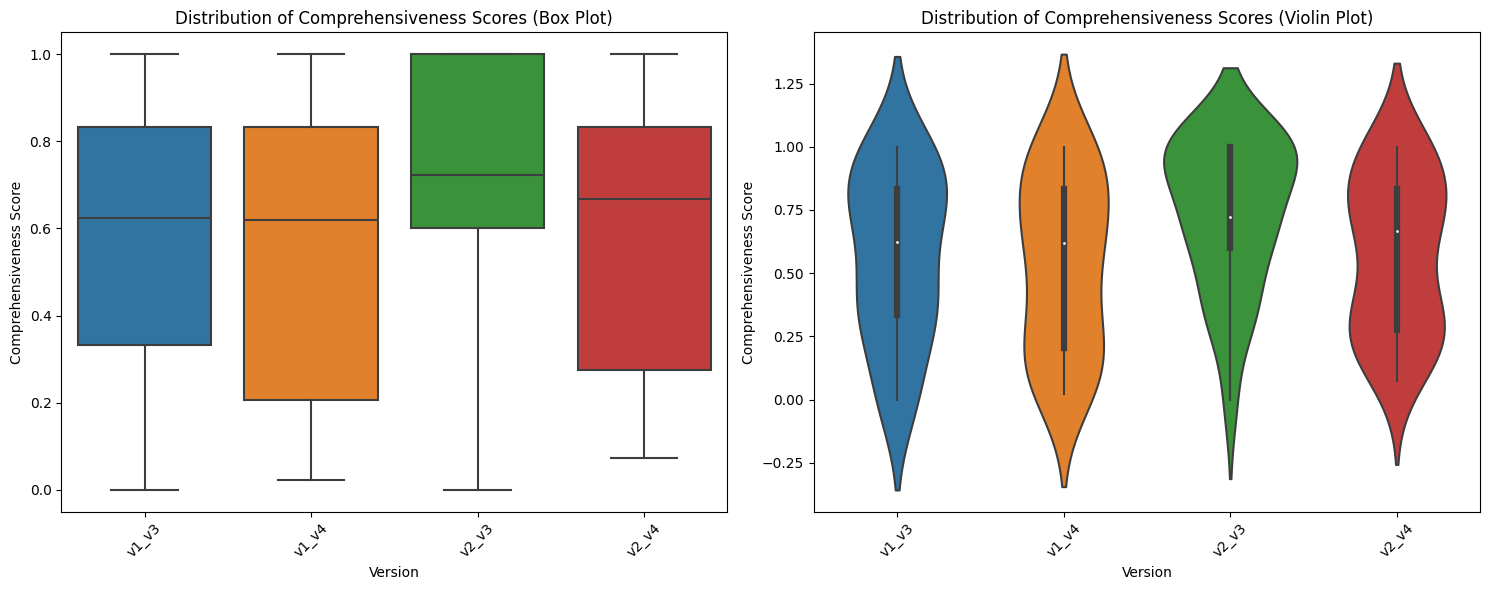

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare data for plotting
all_scores = []
all_versions = []

# Collect data from each version
for scores, version in [
    (v1_v3_eval['comprehensiveness_score'], 'v1_v3'),
    (v1_v4_eval['comprehensiveness_score'], 'v1_v4'),
    (v2_v3_eval['comprehensiveness_score'], 'v2_v3'),
    (v2_v4_eval['comprehensiveness_score'], 'v2_v4')
]:
    all_scores.extend(scores)
    all_versions.extend([version] * len(scores))

# Create DataFrame
plot_data = pd.DataFrame({
    'Score': all_scores,
    'Version': all_versions
})

# Create box plot
sns.boxplot(data=plot_data, x='Version', y='Score', ax=ax1)
ax1.set_title('Distribution of Comprehensiveness Scores (Box Plot)')
ax1.set_ylabel('Comprehensiveness Score')

# Create violin plot
sns.violinplot(data=plot_data, x='Version', y='Score', ax=ax2)
ax2.set_title('Distribution of Comprehensiveness Scores (Violin Plot)')
ax2.set_ylabel('Comprehensiveness Score')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

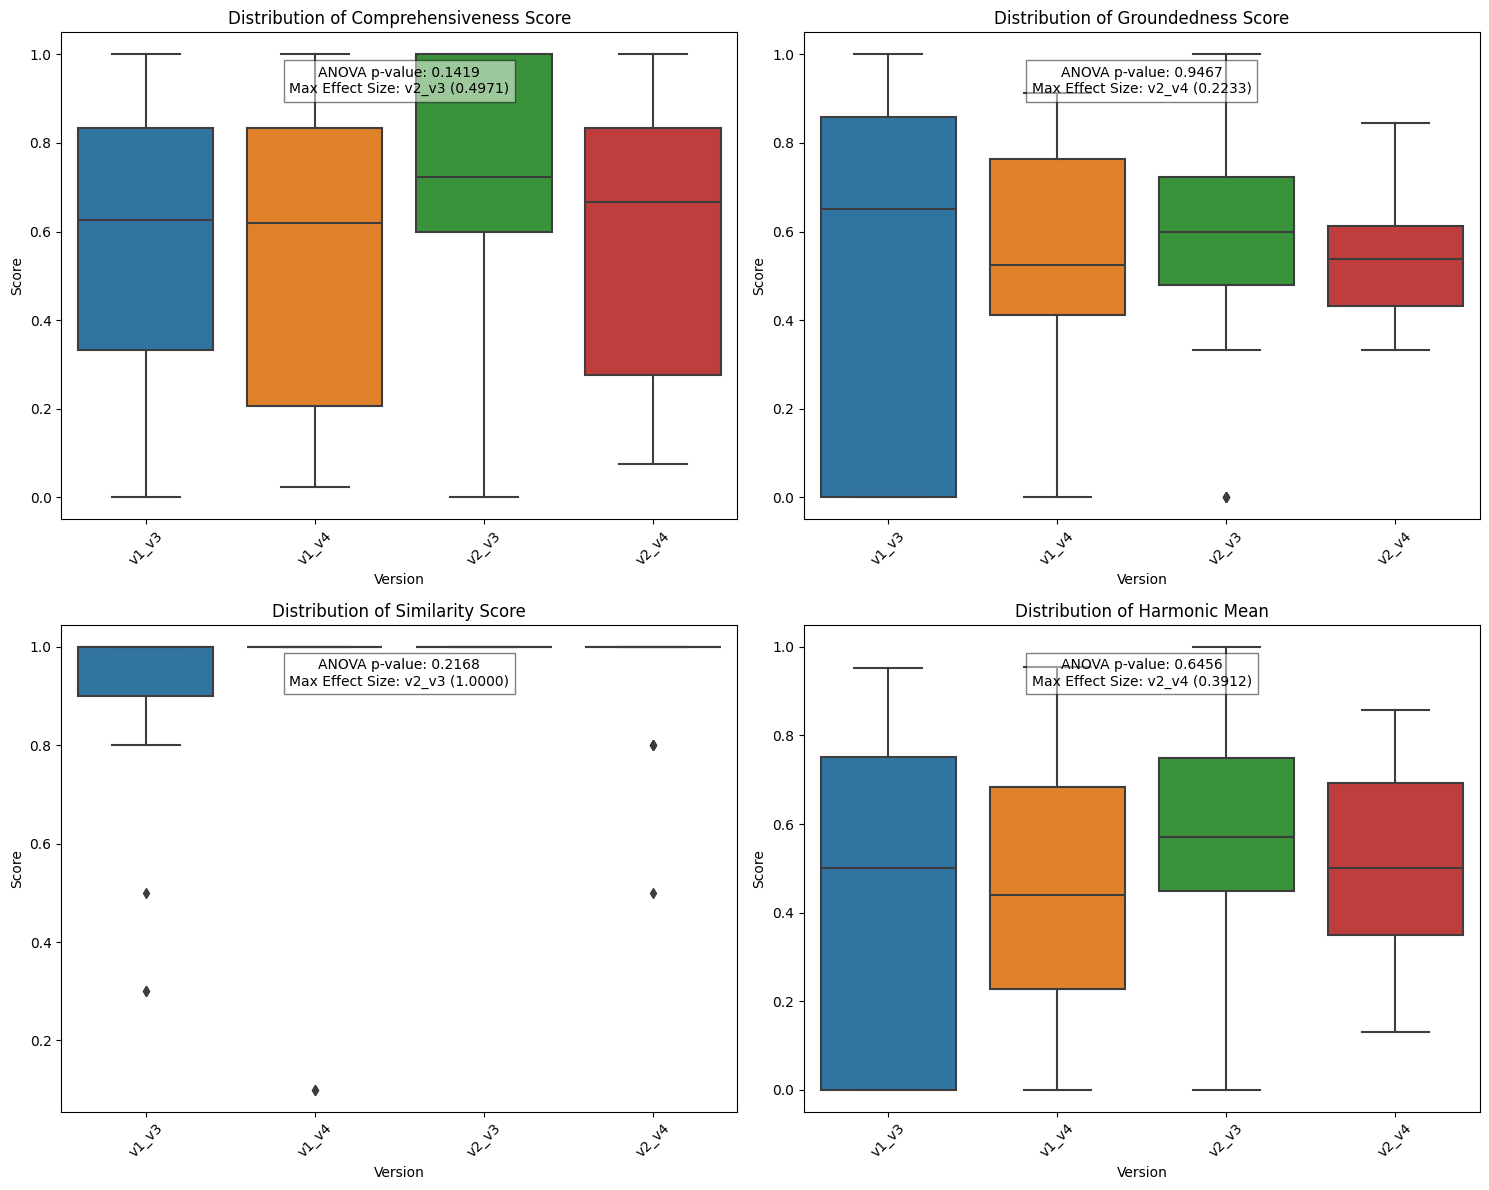

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Metrics and their corresponding axes
metrics_axes = {
    'comprehensiveness_score': ax1,
    'groundedness_score': ax2,
    'similarity_score': ax3,
    'harmonic_mean': ax4
}

# For each metric
for metric, ax in metrics_axes.items():
    # Prepare data for plotting
    all_scores = []
    all_versions = []
    version_scores = []  # To store scores for each version separately
    
    # Collect data from each version
    for scores, version in [
        (v1_v3_eval[metric], 'v1_v3'),
        (v1_v4_eval[metric], 'v1_v4'),
        (v2_v3_eval[metric], 'v2_v3'),
        (v2_v4_eval[metric], 'v2_v4')
    ]:
        all_scores.extend(scores)
        all_versions.extend([version] * len(scores))
        version_scores.append(scores)  # Append scores for ANOVA test
    
    # Perform ANOVA test
    anova_stat, anova_p = f_oneway(*version_scores)
    
    # Calculate effect size (eta squared) for each group
    effect_sizes = []
    for scores in version_scores:
        total_variance = sum((pd.Series(scores) - pd.Series(scores).mean())**2)
        effect_size = anova_stat / (anova_stat + total_variance)
        effect_sizes.append(effect_size)
    
    # Find the group with the largest effect size
    max_effect_size_group = max(zip(['v1_v3', 'v1_v4', 'v2_v3', 'v2_v4'], effect_sizes), key=lambda x: x[1])
    
    # Create DataFrame for this metric
    plot_data = pd.DataFrame({
        'Score': all_scores,
        'Version': all_versions
    })
    
    # Create box plot
    sns.boxplot(data=plot_data, x='Version', y='Score', ax=ax)
    ax.set_title(f'Distribution of {metric.replace("_", " ").title()}')
    ax.text(0.5, 0.9, f'ANOVA p-value: {anova_p:.4f}\nMax Effect Size: {max_effect_size_group[0]} ({max_effect_size_group[1]:.4f})', 
            transform=ax.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

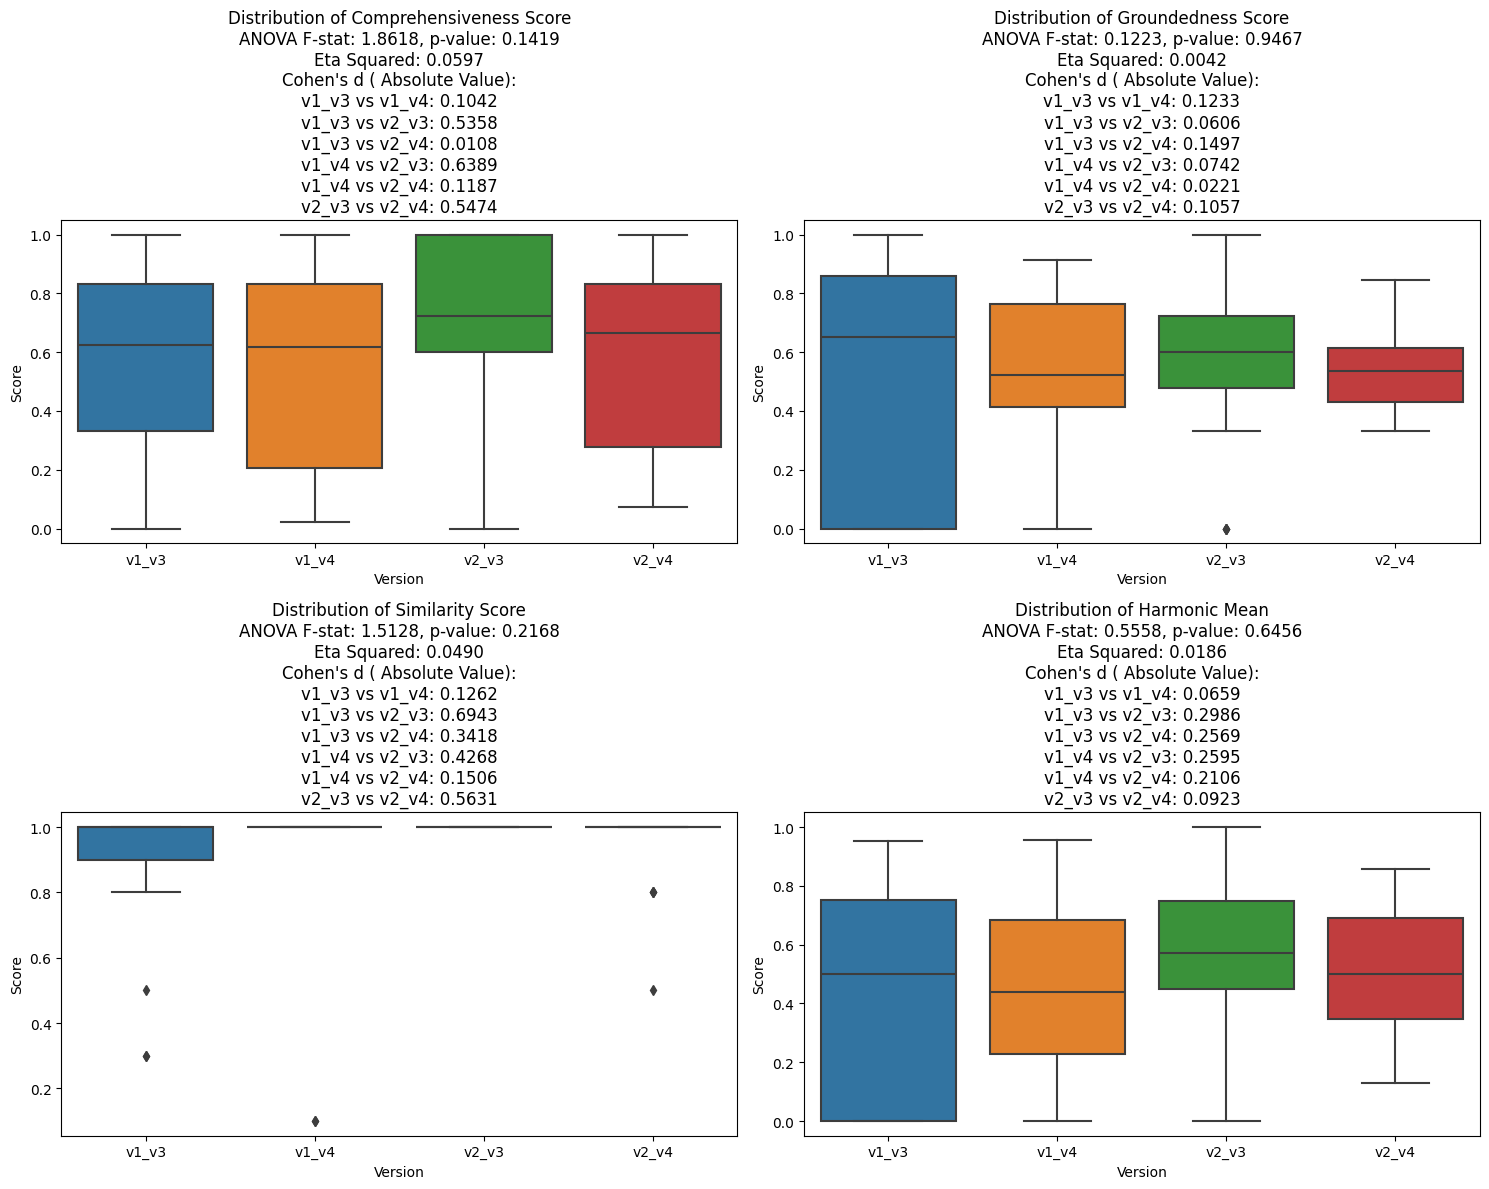

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from itertools import combinations

# Function to compute Cohen's d
def cohen_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std if pooled_std > 0 else 0

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Metrics and their corresponding axes
metrics_axes = {
    'comprehensiveness_score': ax1,
    'groundedness_score': ax2,
    'similarity_score': ax3,
    'harmonic_mean': ax4
}

# For each metric
for metric, ax in metrics_axes.items():
    # Prepare data for plotting
    all_scores = []
    all_versions = []
    version_scores = {}  # Store scores per version
    
    # Collect data from each version
    for scores, version in [
        (v1_v3_eval[metric], 'v1_v3'),
        (v1_v4_eval[metric], 'v1_v4'),
        (v2_v3_eval[metric], 'v2_v3'),
        (v2_v4_eval[metric], 'v2_v4')
    ]:
        all_scores.extend(scores)
        all_versions.extend([version] * len(scores))
        version_scores[version] = scores  # Store scores for ANOVA & Cohen's d
    
    # Perform ANOVA test
    anova_stat, anova_p = f_oneway(*version_scores.values())

    # Compute Sum of Squares
    overall_mean = np.mean(all_scores)
    ss_between = sum(len(scores) * (np.mean(scores) - overall_mean) ** 2 for scores in version_scores.values())
    ss_within = sum(sum((np.array(scores) - np.mean(scores))**2) for scores in version_scores.values())
    ss_total = ss_between + ss_within  # Total Sum of Squares

    # Compute Eta Squared (Effect Size)
    eta_squared = ss_between / ss_total if ss_total > 0 else 0

    # Compute Cohen's d for each pair
    cohen_d_results = {}
    for (v1, scores1), (v2, scores2) in combinations(version_scores.items(), 2):
        cohen_d_results[f"{v1} vs {v2}"] = abs(cohen_d(scores1, scores2))  # Use absolute value

    # Format Cohen's d values
    cohen_d_str = "\n".join([f"{k}: {v:.4f}" for k, v in cohen_d_results.items()])

    # Create DataFrame for this metric
    plot_data = pd.DataFrame({
        'Score': all_scores,
        'Version': all_versions
    })
    
    # Create box plot
    sns.boxplot(data=plot_data, x='Version', y='Score', ax=ax)
    
    # Set title with ANOVA, Eta Squared, and Cohen's d values
    ax.set_title(f'Distribution of {metric.replace("_", " ").title()}\n'
                 f'ANOVA F-stat: {anova_stat:.4f}, p-value: {anova_p:.4f}\n'
                 f'Eta Squared: {eta_squared:.4f}\n'
                 f'Cohen\'s d ( Absolute Value):\n{cohen_d_str}')
    
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


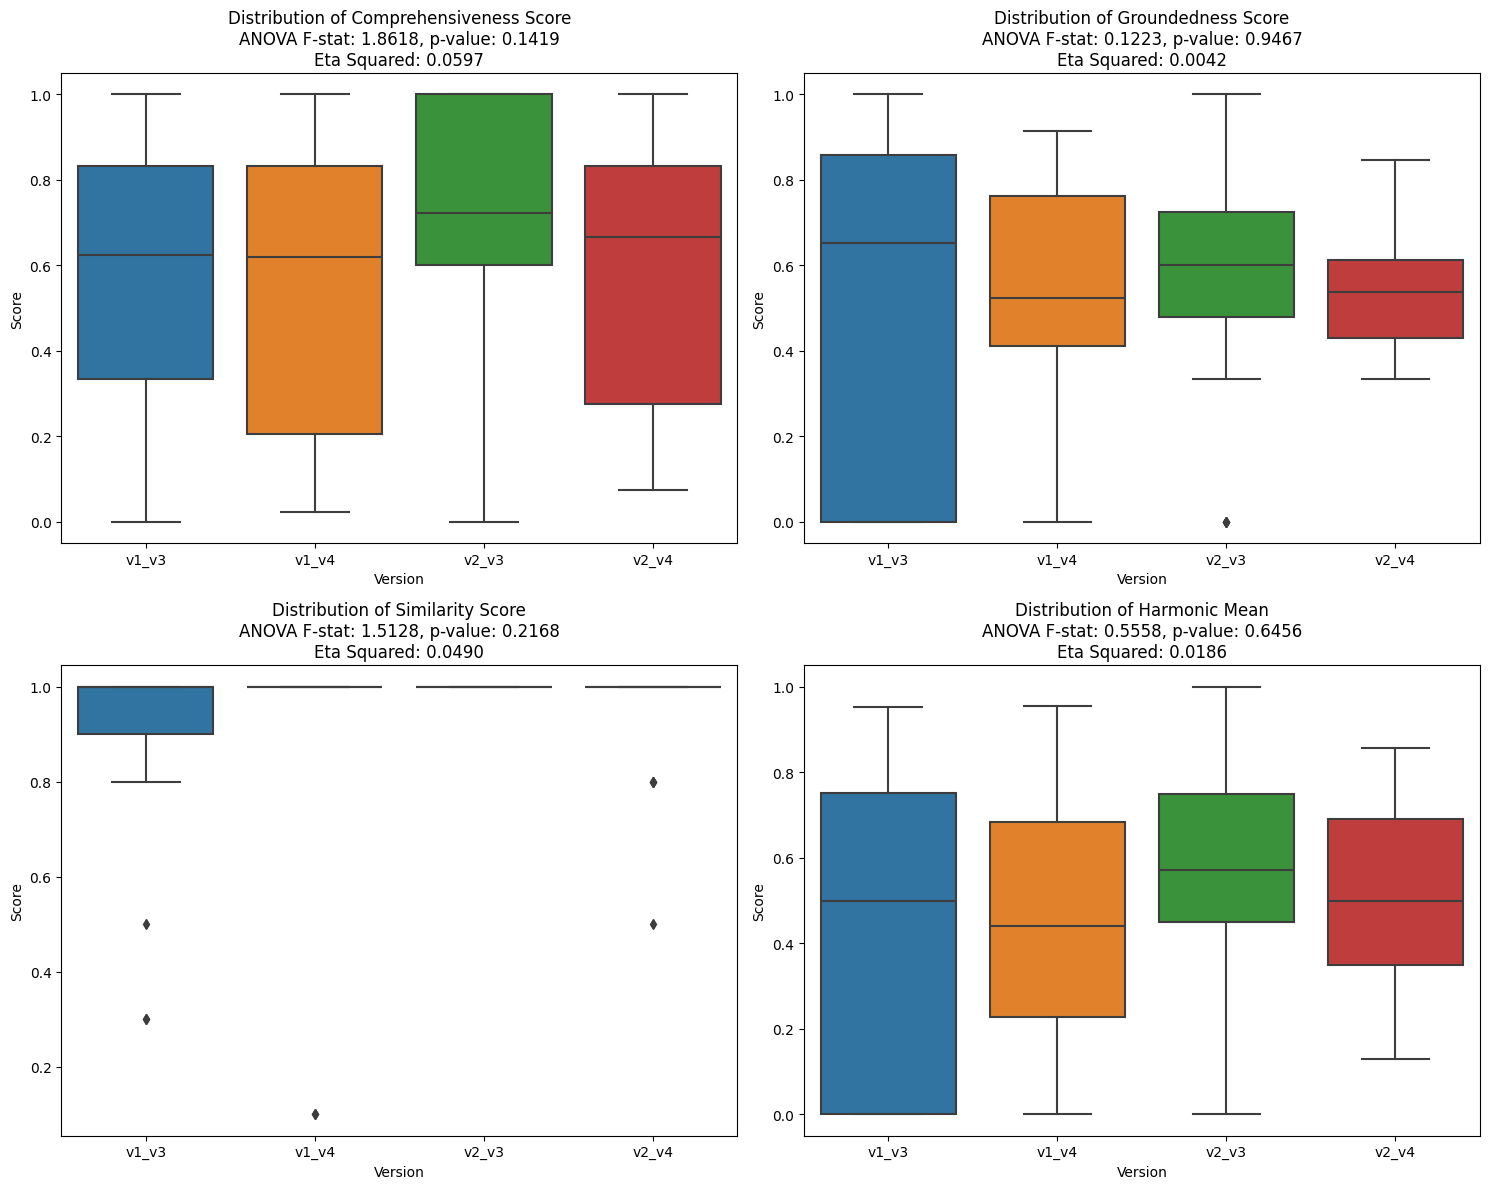

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Metrics and their corresponding axes
metrics_axes = {
    'comprehensiveness_score': ax1,
    'groundedness_score': ax2,
    'similarity_score': ax3,
    'harmonic_mean': ax4
}

# For each metric
for metric, ax in metrics_axes.items():
    # Prepare data for plotting
    all_scores = []
    all_versions = []
    version_scores = []  # To store scores for each version separately
    
    # Collect data from each version
    for scores, version in [
        (v1_v3_eval[metric], 'v1_v3'),
        (v1_v4_eval[metric], 'v1_v4'),
        (v2_v3_eval[metric], 'v2_v3'),
        (v2_v4_eval[metric], 'v2_v4')
    ]:
        all_scores.extend(scores)
        all_versions.extend([version] * len(scores))
        version_scores.append(scores)  # Append scores for ANOVA test
    
    # Perform ANOVA test
    anova_stat, anova_p = f_oneway(*version_scores)

    # Compute Sum of Squares
    overall_mean = np.mean(all_scores)
    ss_between = sum(len(scores) * (np.mean(scores) - overall_mean) ** 2 for scores in version_scores)
    ss_within = sum(sum((np.array(scores) - np.mean(scores))**2) for scores in version_scores)
    ss_total = ss_between + ss_within  # Total Sum of Squares

    # Compute Eta Squared (Effect Size)
    eta_squared = ss_between / ss_total if ss_total > 0 else 0

    # Create DataFrame for this metric
    plot_data = pd.DataFrame({
        'Score': all_scores,
        'Version': all_versions
    })
    
    # Create box plot
    sns.boxplot(data=plot_data, x='Version', y='Score', ax=ax)
    
    # Set title with ANOVA and Eta Squared values
    ax.set_title(f'Distribution of {metric.replace("_", " ").title()}\n'
                 f'ANOVA F-stat: {anova_stat:.4f}, p-value: {anova_p:.4f}\n'
                 f'Eta Squared: {eta_squared:.4f}')
    
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jaeyeopchung/.pyenv/versions/test-en/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jaeyeopchun

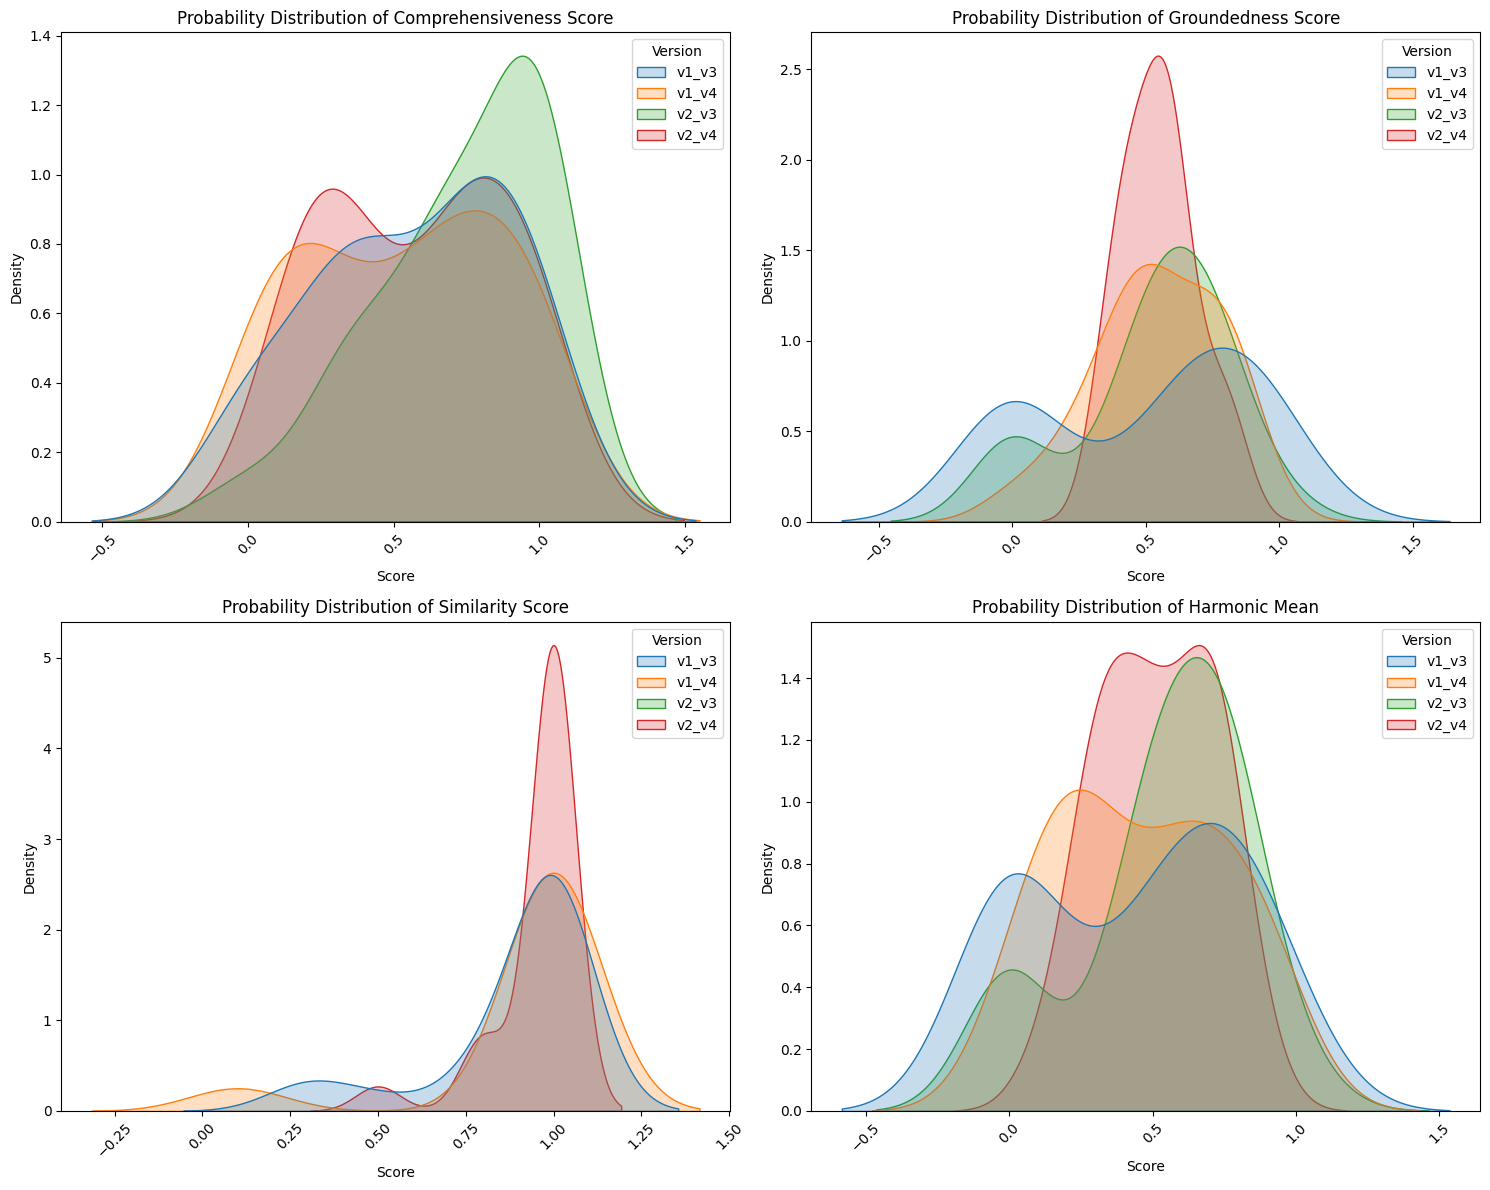

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Metrics and their corresponding axes
metrics_axes = {
    'comprehensiveness_score': ax1,
    'groundedness_score': ax2,
    'similarity_score': ax3,
    'harmonic_mean': ax4
}

# For each metric
for metric, ax in metrics_axes.items():
    # Prepare data for plotting
    all_scores = []
    all_versions = []
    
    # Collect data from each version
    for scores, version in [
        (v1_v3_eval[metric], 'v1_v3'),
        (v1_v4_eval[metric], 'v1_v4'),
        (v2_v3_eval[metric], 'v2_v3'),
        (v2_v4_eval[metric], 'v2_v4')
    ]:
        all_scores.extend(scores)
        all_versions.extend([version] * len(scores))
    
    # Create DataFrame for this metric
    plot_data = pd.DataFrame({
        'Score': all_scores,
        'Version': all_versions
    })
    
    # Create probability distribution plot
    sns.kdeplot(data=plot_data, x='Score', hue='Version', ax=ax, common_norm=False, fill=True)
    ax.set_title(f'Probability Distribution of {metric.replace("_", " ").title()}')
    ax.set_ylabel('Density')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()